From **linear perturbation theory**

We know that the evolution of density perturbations in a universe dominated by fuzzy dark matter (FDM) without self-interactions can be described by the following differential equation:
\begin{equation}
\ddot{\delta_k} + 2 H \dot {\delta_k} - \left[\frac{h^{2}k^{4}}{4 m^{2} a^{4}} - 4 \pi G \bar{\rho_m}(t)  \right]\delta_{k} = 0
\end{equation}

- What are the initial conditions for which numerical time evolution of $\delta_k$ is obtained?
- For every $k$ value, solve the above ODE (using RK method?) and see how $\delta_{k}$ changes with time. 
- Obtain the power spectra for each $k$ value at the last time step and plot $P(k)$ vs $k$. 

In [64]:
output_path = '/home/isha/Desktop/AU/Work_Done/Wave_Dark_Matter/Obtaining_Power_Spectrum/FDM/' 

In [65]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

In [66]:
k_pow = np.arange(-3,2)   #Mpc^-1
k_val = 10.0 ** k_pow

length_scale = 2 * np.pi / k_val    #Mpc
k_val, length_scale

(array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
 array([6.28318531e+03, 6.28318531e+02, 6.28318531e+01, 6.28318531e+00,
        6.28318531e-01]))

In [67]:
#Constants taken to be = 1 for testing
G = 1
hbar = 1
m = 1

**For matter dominant era only**

In [68]:
def scale_factor_a(t):
    return (t**(2/3))

def Hubble_val(t):
    return (2/(3*t))

def rho_matter(t):
    return (1/(6 * np.pi * G * t**2))

#Note that 4 pi G rho_m = 2/(3 t^2) in matter dominated era



Thus the above 2nd order ODE is simplified as

\begin{equation}
\ddot{\delta_k} + \frac{4}{3t} \dot {\delta_k} - \frac{2}{3t^{2}} \delta_{k} = 0
\end{equation}

This can be converted into 1st order as

\begin{equation}
y_{1} = \delta
\end{equation}

\begin{equation}
y_{2} = \dot y_{1} = \dot {\delta}
\end{equation}

The simplified equation then becomes
\begin{equation}
\dot y_{2} + \frac{4}{3t} y_{2} - \frac{2}{3t^{2}} y_{1} = 0
\end{equation}



In [69]:
#Initial conditions for delta_k proportional to a and delta_k_dot propertioonal to 2a/3t
#Also see equation 5.54 in Baumann Cosmology textbook

t_i =  1e-2
t_f = 1e6
t_span = [t_i, t_f]
t_eval = np.logspace(np.log10(t_i), np.log10(t_f), 500)

delta0 = 1e-5 #Arbitrary choice
delta0_dot = 0     #Dont use the analytic expression: 2**delta_k / (3*t_i) 
#Assume initial growth rate is zero

initial_conditions = [delta0, delta0_dot]
initial_conditions

[1e-05, 0]

### For 1 value of k

In [70]:
#For 1 value of k
k_sel = k_val[0]   #Mpc^-1
k_sel = 100


def ode_fdm(t, y):
    u1, u2 = y      #u1 = delta | u2 = delta_dot
    
    #H = 2 / (3 * t)
    quantum_term = (hbar**2 * k_sel**4) / (4 * m**2 * scale_factor_a(t)**4)
    grav_term = 4 * np.pi * G * rho_matter(t)

    #Solve the following coupled 1st order ODEs
    du1_dt = u2
    du2_dt_fdm = -2*Hubble_val(t)*u2 + (grav_term - quantum_term)*u1
    return [du1_dt, du2_dt_fdm]


sol_fdm = solve_ivp(
        ode_fdm,
        t_span,
        initial_conditions,
        t_eval=t_eval,
        #method = 'LSODA'
    )

fdm_df = pd.DataFrame({
    't': sol_fdm.t,
    'delta_fdm': sol_fdm.y[0],
    'delta_dot_fdm': sol_fdm.y[1],
    'scale_factor_a': scale_factor_a(sol_fdm.t)
})
fdm_df

,t,delta_fdm,delta_dot_fdm,scale_factor_a
0,0.010000,0.000010,0.000000e+00,0.046416
1,0.010376,-0.000009,1.124375e+01,0.047572
2,0.010766,-0.000011,7.587907e-01,0.048758
3,0.011171,0.000003,2.170656e+01,0.049972
4,0.011591,-0.000011,-5.578324e+00,0.051218
...,...,...,...,...
495,862723.729246,-0.000696,1.574375e-08,9062.496023
496,895166.472138,0.000486,3.249021e-08,9288.292250
497,928829.225017,0.000371,-3.554648e-08,9519.714293
498,963757.866384,-0.000726,-8.160208e-09,9756.902323


In [71]:
k_sel

100

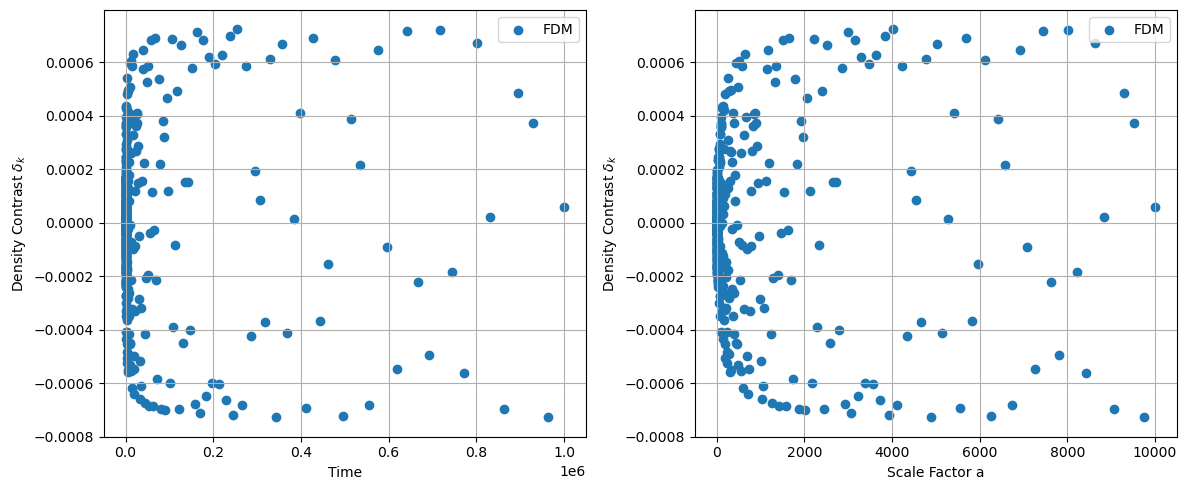

In [72]:
fig,ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].scatter(fdm_df['t'], fdm_df['delta_fdm'], label='FDM')
ax[1].scatter(fdm_df['scale_factor_a'], fdm_df['delta_fdm'], label='FDM')

ax[0].set_xlabel('Time')
ax[1].set_xlabel('Scale Factor a')

ax[0].set_ylabel('Density Contrast $\delta_{k}$')
ax[1].set_ylabel('Density Contrast $\delta_{k}$')
for i in ax:
    i.legend()
    i.grid()
plt.tight_layout()
#plt.savefig(output_path + 'FDM_delta_k_vs_time_and_a_100Mpc-inv.png', dpi=300)

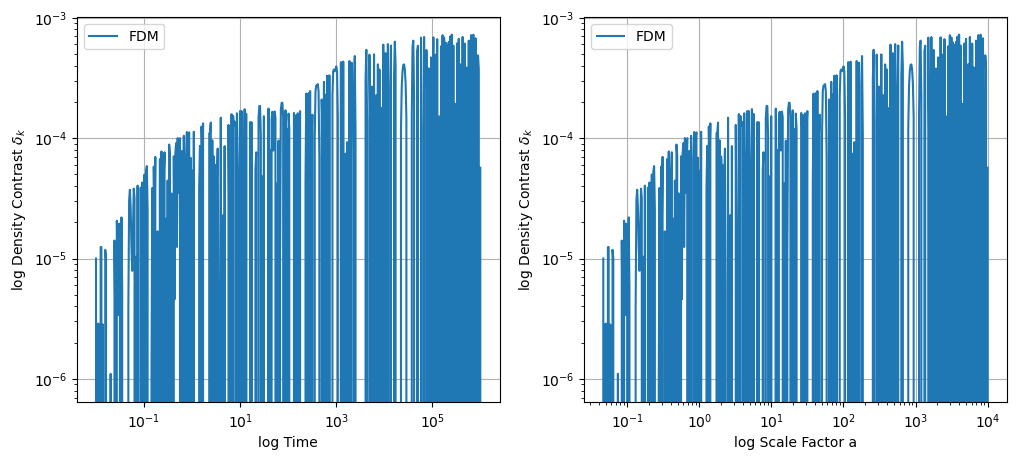

In [73]:
fig,ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].plot(fdm_df['t'], fdm_df['delta_fdm'], label='FDM')
ax[1].plot(fdm_df['scale_factor_a'], fdm_df['delta_fdm'], label='FDM')

ax[0].set_xlabel('log Time')
ax[1].set_xlabel('log Scale Factor a')

ax[0].set_ylabel('log Density Contrast $\delta_{k}$')
ax[1].set_ylabel('log Density Contrast $\delta_{k}$')


for i in ax:
    i.legend()
    i.grid()
    i.set_xscale('log')
    i.set_yscale('log')

#plt.savefig(output_path + 'FDM_log_delta_k_vs_log_time_and_a_100Mpc-inv.png', dpi=300)

fig, ax  = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(t_eval, scale_factor_a(t_eval), label='Scale Factor a(t)')
ax[1].loglog(t_eval, scale_factor_a(t_eval), label='Scale Factor log a(t)')
ax[0].set_xlabel('t')
ax[0].set_ylabel('Scale Factor a(t)')
ax[1].set_xlabel('t')
ax[1].set_ylabel('log a(t)')



In [74]:
#Here we have a second order differential equation in time for each k mode. 
#We can convert this into two first order differential equations as follows:

def ode_fdm_allkvals(t, y, k):
    u1, u2 = y      #u1 = delta | u2 = delta_dot
    
    #H = 2 / (3 * t)
    quantum_term = (hbar**2 * k**4) / (4 * m**2 * scale_factor_a(t)**4)
    grav_term = 4 * np.pi * G * rho_matter(t)

    #Solve the following coupled 1st order ODEs
    du1_dt = u2
    du2_dt_fdm = -2*Hubble_val(t)*u2 + (grav_term - quantum_term)*u1
    return [du1_dt, du2_dt_fdm]

In [75]:
fdm_allkvals = []
for k_i in k_val:
    sol_fdm = solve_ivp(
        ode_fdm_allkvals,
        t_span,
        initial_conditions,
        t_eval=t_eval,
        args=(k_i,),
        #method = 'LSODA'
    )

    for j in range(len(t_eval)):
        fdm_allkvals.append(
            {
                't': t_eval[j],
                'k': k_i,
                'delta_fdm': sol_fdm.y[0][j],
                'delta_dot_fdm': sol_fdm.y[1][j],
                'scale_factor_a': scale_factor_a(t_eval[j])
            }
        )


In [76]:

df_fdm_allkvals = pd.DataFrame(fdm_allkvals)
df_fdm_allkvals.to_csv(output_path + 'fdm_density_growth_allkvals.csv', index=False)

In [77]:
df_fdm_allkvals

,t,k,delta_fdm,delta_dot_fdm,scale_factor_a
0,0.010000,0.001,0.000010,0.000000e+00,0.046416
1,0.010376,0.001,0.000010,2.357711e-05,0.047572
2,0.010766,0.001,0.000010,4.518738e-05,0.048758
3,0.011171,0.001,0.000010,6.497338e-05,0.049972
4,0.011591,0.001,0.000010,8.307164e-05,0.051218
...,...,...,...,...,...
2495,862723.729246,10.000,-0.000040,-1.987492e-11,9062.496023
2496,895166.472138,10.000,-0.000041,-1.958079e-11,9288.292250
2497,928829.225017,10.000,-0.000042,-1.929402e-11,9519.714293
2498,963757.866384,10.000,-0.000042,-1.901536e-11,9756.902323


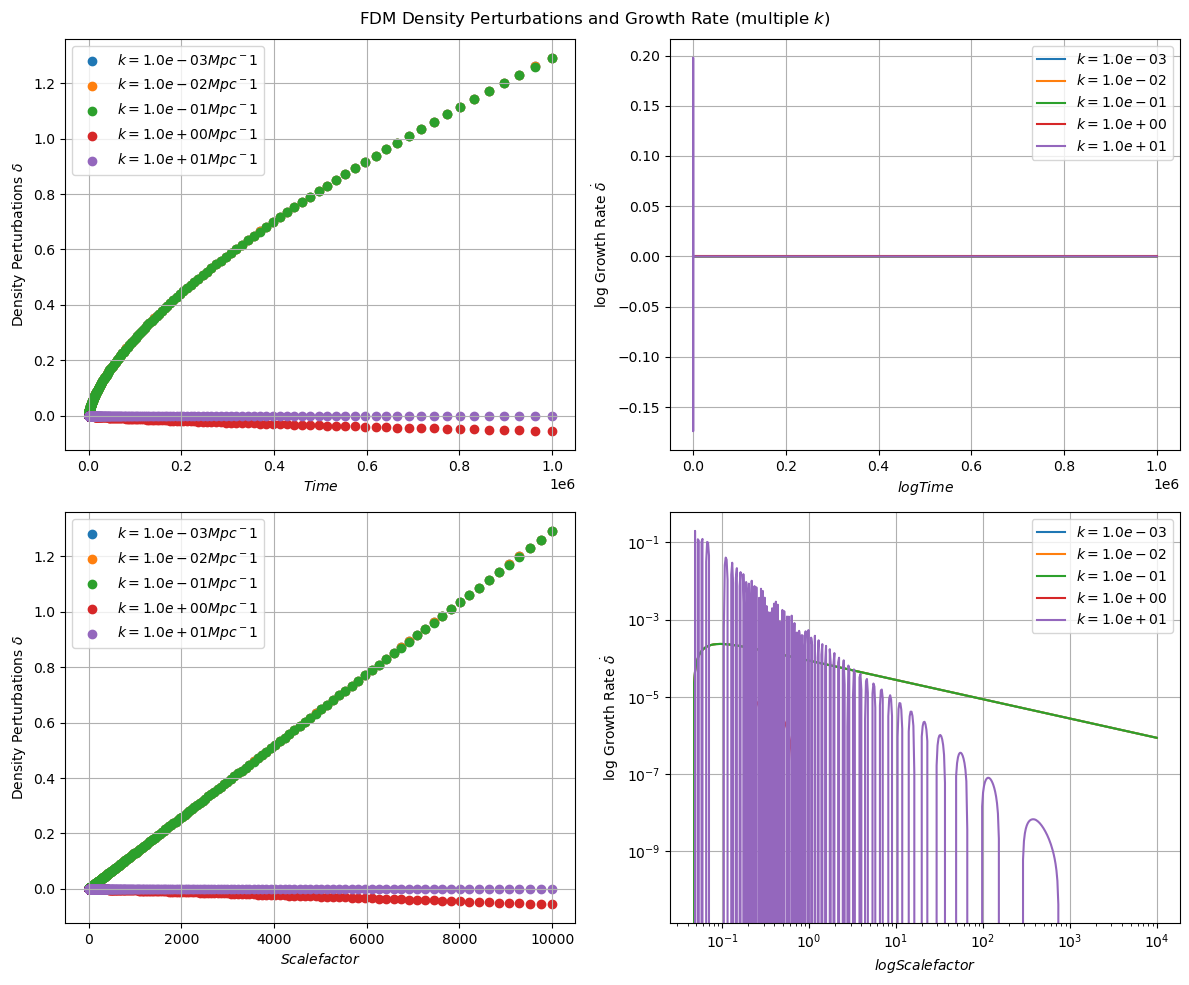

In [89]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for k_i in sorted(df_fdm_allkvals['k'].unique()):
    df_k = df_fdm_allkvals[df_fdm_allkvals['k'] == k_i]

    ax[0][0].scatter(
        df_k['t'],
        df_k['delta_fdm'],
        label=fr"$k={k_i:.1e} Mpc^{-1}$"
    )

    ax[0][1].plot(
        df_k['t'],
        df_k['delta_dot_fdm'],
        label=fr"$k={k_i:.1e}$"
    )

    ax[1][0].scatter(
        df_k['scale_factor_a'],
        df_k['delta_fdm'],
        label=fr"$k={k_i:.1e} Mpc^{-1}$"
    )

    ax[1][1].loglog(
        df_k['scale_factor_a'],
        df_k['delta_dot_fdm'],
        label=fr"$k={k_i:.1e}$"
    )


ax[0][0].set_xlabel("$Time$")
ax[0][1].set_xlabel("$log Time$")
ax[1][0].set_xlabel("$Scale factor$")
ax[1][1].set_xlabel("$log Scale factor$")



ax[0][0].set_ylabel(r"Density Perturbations $\delta$")
ax[0][1].set_ylabel(r"log Growth Rate $\dot{\delta}$")

ax[1][0].set_ylabel(r"Density Perturbations $\delta$")
ax[1][1].set_ylabel(r"log Growth Rate $\dot{\delta}$")
 

for i in ax: 
    for j in i:
        j.legend()
        j.grid()

plt.suptitle("FDM Density Perturbations and Growth Rate (multiple $k$)")
plt.tight_layout()
plt.savefig(output_path + "fdm_density_growth_allk.png", dpi=300)
plt.show()


In [79]:
t_final_fdm = df_fdm_allkvals['t'].max()
df_fdm_final = df_fdm_allkvals[df_fdm_allkvals['t'] == t_final_fdm]


In [83]:
#As P(k) values are proportional to |delta(k)|^2
df_fdm_final['P_k'] = df_fdm_final['delta_fdm'] **2
df_fdm_final['Delta2_k'] = (df_fdm_final["k"]**3 / (2 * np.pi**2)) * df_fdm_final["P_k"]
df_fdm_final

/tmp/ipykernel_7134/310088060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fdm_final['P_k'] = df_fdm_final['delta_fdm'] **2
/tmp/ipykernel_7134/310088060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fdm_final['Delta2_k'] = (df_fdm_final["k"]**3 / (2 * np.pi**2)) * df_fdm_final["P_k"]


,t,k,delta_fdm,delta_dot_fdm,scale_factor_a,P_k,Delta2_k
499,1000000.0,0.001,1.292266,8.615450e-07,10000.0,1.669952e+00,8.460077e-11
999,1000000.0,0.010,1.292266,8.615449e-07,10000.0,1.669952e+00,8.460076e-08
1499,1000000.0,0.100,1.291521,8.610480e-07,10000.0,1.668026e+00,8.450320e-05
1999,1000000.0,1.000,-0.056432,-3.762093e-08,10000.0,3.184554e-03,1.613314e-04
2499,1000000.0,10.000,-0.000043,-1.874793e-11,10000.0,1.855388e-09,9.399505e-08


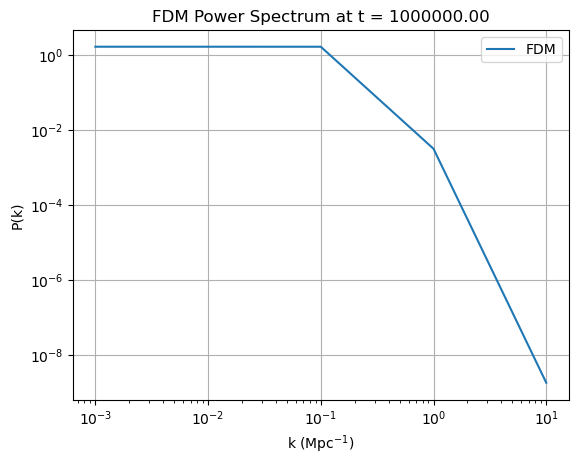

In [84]:
plt.plot(df_fdm_final['k'], df_fdm_final['P_k'], label='FDM')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k (Mpc$^{-1}$)')
plt.ylabel('P(k)')
#plt.ylim(0,1e75)
plt.title('FDM Power Spectrum at t = {:.2f}'.format(t_final_fdm))
plt.grid(True)
plt.legend()
plt.savefig(output_path + 'fdm_power_spectrum.png', dpi=300)
plt.show()

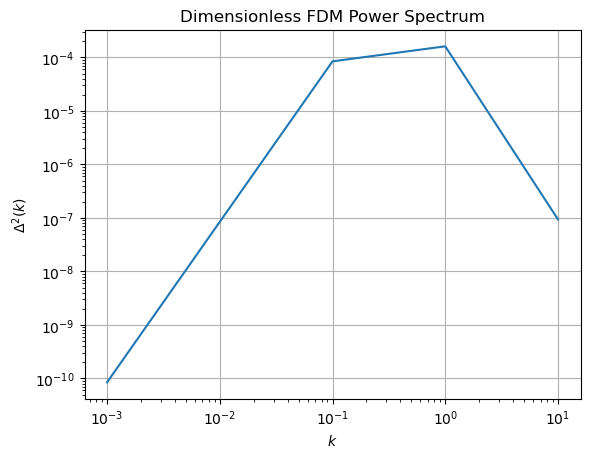

In [88]:
#plt.plot(df_fdm_final["k"], df_fdm_final["Delta2_k"])
plt.loglog(df_fdm_final["k"], df_fdm_final["Delta2_k"])
plt.xlabel(r"$k$")
plt.ylabel(r"$\Delta^2(k)$")
plt.title("Dimensionless FDM Power Spectrum")
plt.grid(True)
plt.show()